In [16]:
#all import statements - so they're all in one place
import numpy as np
import pandas as pd
import utils as ut
import spotify_api as sp
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

# Quantified Self Project: Spotify Listening History Analysis
**CPSC 222 - Gina Sprint - Fall 2020  
Nelly Alger**

## Introduction
### Domain
The domain of my project is music. Music is a big passion of mine, I spend a large amount of my time finding new music, making playlists, and going to concerts (when COVID isn't present). This project will be a self analysis of a domain that I am passionate about, and with it I aim to research and gain some insights about my own music listening habits based on listening history over the past year. I hope to learn more about the way I spend my time listening to what music, my likes and dislikes, and how much time I devote to it.

### Hypotheses
I chose to focus primarily on the months of June and July for my analysis. In the exploratory data analysis, I will produce visualizations that demonstrate these two months being the months I listened to the most music. My hypotheses are as follows:
- I predict that on average, I listened to about 2-3 hours worth of music daily, and that I played about 150-200 songs a day, but that I also skipped about half the songs that came on
- I predict that 50% of the songs I listen to came from my library, and 50% were outside my library, discovering new music
- The visualizations show that I listened to more music in July than June, but I want to know if on average, I listened to more songs per day in July than in June 

These results will impact the way I listen to music in the future and how deliberate I am about what I listen to and for how long. I am a stakeholder in my results because the results will tell me information about myself that will impact me and maybe change my behavior, and Spotify is also a stakeholder because they are providing me the data to analyze. The only other stakeholders would be anyone I show this information to, such as my classmates and professor, and friends and family because they will see my project's results and they might have an interest in performing their own analysis on their music habits in order to gain their own insights. 

### Classification
For the classification of my dataset, I chose to classify the songs based on whether I skipped them or not. I used the day of the week, whether a song was in my library, and the popularity of a song to predict whether I would skip it or not. I found my classifiers to not be super accurate, the best accuracy I could get was about 62%.

## Data Analysis

### Dataset Description
One data table includes every song I've listened to in the past year, its artist, time played, and date/time of listen. This is my main data source I will be analyzing, along with a list of songs in my library. These tables were downloaded from the Spotify website as JSON files, and I converted them to CSV files. The Python `datetime` library will function as a way to separate songs by the time, day, or month I listened to them, and also to add an attribute for the day of the week. Later on for classification, I will use the Spotify API search request to add each song's popularity attribute.

### Data Preparation
There are no missing values in my dataset. However, the `endTime` and `msPlayed` attributes were a messy so I modified columns to represent them better. `endTime` includes the date and time listened as one long string that I converted to Python's date-time library format. I used this column to add a column for the day of the week a song was played, represented by an integer (Monday=0, Sunday=6). `msPlayed` represents the amount of time I listened to a song, which I also converted to timedelta date-time format. Based on this attribute, I added a `boolean` "skipped" column based on the length of time I played a song. To determine this, I considered a song played for less than 30 seconds to be skipped. 

I then convert this dataframe to a csv file called "streaming_history_all_cleaned.csv".

In [38]:
#load datasets
spotify_df = ut.load_listening_history("StreamingHistoryALL.csv")
library_df = ut.load_song_library("YourLibrary.json")

#clean listening history
ut.clean_endtime_column(spotify_df)
ut.clean_msplayed_column(spotify_df)
ut.add_skipped_column(spotify_df)

#print(spotify_df)
spotify_df.to_csv("streaming_history_all_cleaned.csv")

### Exploratory Data Analysis
In the following data visualizations, I have grouped my listening history by month and compiled visualizations for total number of sings I've listened to, total time spent listening to music, and number of songs skipped vs played by month. I used a line graph to compare the first two, and a bar graph to compare skips vs plays side by side by month. I aggregate data using .sum() to add up all of one attribute for a single month. 

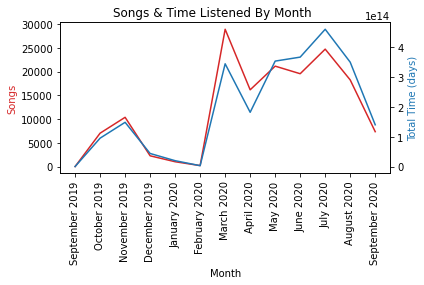

In [39]:
#visualize songs/time listened per month
month_labels, grouped_by_month = ut.visualize_songs_per_month(spotify_df)

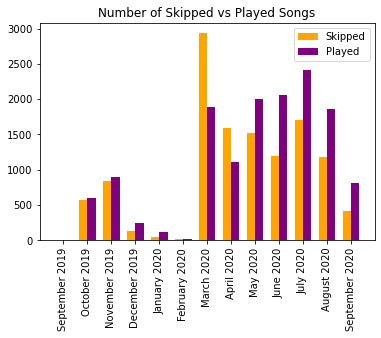

In [19]:
#visualize skipped vs not skipped by month
ut.visualize_skips_per_month(month_labels, grouped_by_month)

#### Visualization Breakdown
These visualizations give an overall picture of my listening history. I used to be an Apple Music user, and decided to try the 3-month trial of Spotify Premium, from October to December of 2019. I decided in March to buy spotify premium and from then on used it as my primary music platform, which is why there's a huge spike in my listening history in March. 

The reason I skipped so many songs in March was because when quarantine started in March, I spent a ton of time going through each song and filtering them into playlists, skipping through them quickly. Throughout the monthts after March and April, my listening history normalizes, and my normal listening habits can be seen most clearly in May, June, July, and August. September is shorter since the day I downloaded my listening history was mid way through September.

### Testing My Hypotheses
I decided to analyze 2 months, June and July, for the rest of my project, since I believe these  months best represent my most regular listening habits.

About how many songs do I listen to per day? How many hours of music do I listen to per day?

In [20]:
#JUNE & JULY DISCOVERY ANALYSIS
june_listening_history = grouped_by_month.get_group("2020-06-30 00:00:00")
july_listening_history = grouped_by_month.get_group("2020-07-31 00:00:00")

#songs per day
june_spd = ut.find_spd(june_listening_history)
july_spd = ut.find_spd(july_listening_history)

#time per day
june_avg = ut.find_avg_tpd(june_listening_history)
july_avg = ut.find_avg_tpd(july_listening_history)

print("JUNE")
print("\tAverage number of songs listened to per day:", "%.2f"%np.average(june_spd))
print("\tAverage listening time daily:", june_avg)
print("\nJULY")
print("\tAverage number of songs listened to per day:", "%.2f"%np.average(july_spd))
print("\tAverage listening time daily:", july_avg)

JUNE
	Average number of songs listened to per day: 108.60
	Average listening time daily: 0 days 03:24:12.274800

JULY
	Average number of songs listened to per day: 132.90
	Average listening time daily: 0 days 04:07:52.636741


I predicted that I listen to an average of 150-200 songs per day, so my prediction was a little higher than the June and July averages, 108 and 132. 

I predicted that I spend about 2-3 hours per day listening to music, but my actual average daily listening time was a lot higher: 3 hours 24 minutes in June, and 4 hours 7 minutes in July.

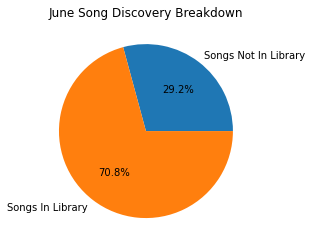

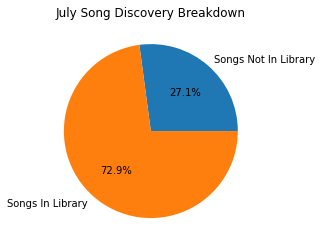

In [21]:
#add in library column - takes 20 seconds to run
june_listening_history.reset_index(inplace=True)
july_listening_history.reset_index(inplace=True)
ut.add_inlibrary_column(june_listening_history, library_df)
ut.add_inlibrary_column(july_listening_history, library_df)

#Visualize June & July Discovery
ut.visualize_2month_discovery(june_listening_history, july_listening_history)

My prediction was that 50% of songs I listen to come from my library and 50% are outside of my library, discovering music. In reality, 70-73% is from my library and 27-30% is not.

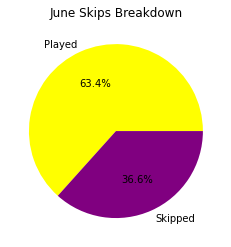

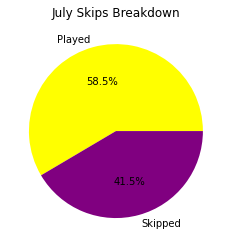

In [22]:
#Visualize June & July Skips
ut.visualize_2month_skips(june_listening_history, july_listening_history)

I predicted that I skip about 50% of songs I play. These visualizations demonstrate that in June, I skipped about 37% of songs, and in July I skipped 41.5%.

### HYPOTHESIS T-TEST
Based on the visualizations above, I listened to more songs in July than June. 

Using the listening history datasets from June and July 2020 and a significance level of 0.01, I want to know if the average number of songs I listened to per day was greater in July than June?

- There are 2 samples (June & July) so the test is **Two-Sampled**
- The problem *does* state a direction (greater than) so the test is **One-Tailed**
- The samples are from unrelated groups, i.e. the month listening histories compared are two different months with different days, so the two samples are **Independent**

First, gather the dataset:

In [23]:
# songs per day found above
print("June songs per day:", june_spd)
print("\nJuly songs per day:", july_spd)

June songs per day: [116, 47, 134, 7, 76, 96, 199, 128, 91, 89, 165, 30, 55, 184, 177, 113, 151, 56, 39, 210, 57, 94, 33, 7, 141, 77, 128, 277, 201, 80]

July songs per day: [49, 154, 119, 177, 235, 246, 94, 134, 63, 141, 371, 93, 33, 76, 139, 119, 232, 316, 9, 15, 75, 53, 137, 205, 207, 103, 200, 23, 195, 10, 97]


#### STEP 1: Identify null and alternative hypothesis
Null hypothesis $H_0$ and Alternative hypothesis $H_1$ are determined based on the hypothesis we are testing:
- $H_0: \mu_{july} \leq \mu_{june}$ 
- $H_1: \mu_{july} > \mu_{june}$ 

#### STEP 2: State the level of significance
- $\alpha = 0.01$ (from problem statement)


#### STEP 3: Select the appropriate test statistic
Because this is a two-sample test, we use this test statistic:

$t = \frac{\overline{X}_1 - \overline{X}_2}{\sqrt{{s_p}^2(\frac{1}{n_1}+\frac{1}{n_2})}}$

Pooled variance ${s_p}^2$ is found using the following formula:

${s_p}^2 = \frac{(n_1 - 1){s_1}^2 +(n_2 - 1){s_2}^2}{n_1 + n_2 - 2}$

#### STEP 4: Formulate the decision rule
First, we use the following information to find the critical value on the t-distribution table:
- df = n1 + n2 - 2 = 30+31-2 = 59
- $\alpha = 0.01$
- One-tailed test

We find critical value t = 2.390

Since $H_1$: $\mu_{july} > \mu_{june}$, this is a right-tailed test, so the decision rule is as follows:
- If t-computed is > 2.390, then Reject $H_0$.
- If t-computed is <= 2.390, then Do Not Reject $H_0$.

#### STEP 5: Make a decision
Compute t-computed using the sample and the formula

In [24]:
t_computed, p_value = stats.ttest_ind(july_spd, june_spd)
print("SCIPY t:", "%.4f"%t_computed, "p:", "%.4f"%(p_value/2)) #one-tailed -- divide by 2

SCIPY t: 1.2008 p: 0.1173


Because t-computed 1.2008 <= 2.390, we **do not reject $H_0$**.  

Since $p=0.1173 > \alpha = 0.01$, we again **do not reject $H_0$**.

At the .01 level of significance, these results demonstrate that we don't have sufficient evidence to say the mean number of songs listened to daily in July is greater than the mean daily songs in June. It's possible that June's average daily songs is higher than July's, even though I listened to more songs in July than June.

## Classification
My classification attribute is whether or not a song will be skipped. The song's popularity, whether it's in my library, and the day of week it is played are used to classify a song as skipped or not skipped. I used the Spotify API to find each song's popularity, and the functions to do so are located in the spotify_api.py file:

In [26]:
# *****NOTE - this code block takes about 5-10 minutes to run!*****
sp.add_popularity_column(june_listening_history)
sp.add_popularity_column(july_listening_history)

Then, I concatinated the June and July dataframes to analyze them together, and dropped all instances with a missing value, since some of the songs didn't have a popularity value.

I scaled the two attributes to prevent one being weighed more heavily, and divided the dataset into training and testing sets using the hold out method.

In [40]:
# preprocessing
summer_df = pd.concat([june_listening_history, july_listening_history])
summer_df.dropna(inplace=True)
summer_df.to_csv("summer.csv")
y = summer_df["skipped"]
X = summer_df[["song popularity", "day_of_week", "in_library"]]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #splits by default 25%

I create a kNN classifier object and output the accuracy of classification. Then I see how it compares to a Decision Tree Classifier and a Linear Regression model

In [37]:
# kNN classifier
clf = KNeighborsClassifier(n_neighbors=200, metric="euclidean")
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("%.2f"%(accuracy * 100), "% accurate with 200 neighbors")

62.10 % accurate with 200 neighbors


In [29]:
# Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)
#y_predicted_tree = clf2.predict(X_test)
#print(y_predicted_tree)

accuracy_tree = clf2.score(X_test, y_test)
print("%.2f"%(accuracy_tree * 100), "% accurate")

57.69 % accurate


In [30]:
# Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
r2 = reg.score(X_test, y_test)
print("Linear Regression R2 (coefficient of determination):", r2)

Linear Regression R2 (coefficient of determination): 0.004231594701117447


### Results
I used the kNN and decision tree classifier's score, or accuracy metric to measure a percentage of how well they performed. I used the linear regression's coefficient of determination, $R^2$ to measure how well it performed. 

My kNN classifier was the most accurate with 62% accuracy, and after testing varying $n$ values, I found the most accurate classifier to have 200 neighbors. My Decision Tree Classifier was less accurate, with 58% accuracy. My linear regression model's coefficient of determination being 0.004 demonstrated a very weak relationship between x and y, and that my model was not very good.

## Conclusion

Provide a brief conclusion of your project, including a short summary of the dataset you used (and any of its inherent challenges for classification), the classification approach you developed, your classifiers’ performance, and any ideas you have on ways to improve performance. Lastly, describe the potential impacts of your work (including ethical impacts) for the stakeholder’s you described in the introduction.

The Spotify listening history dataset provided lots of cool insights into my listening habits. I spend more time listening to music, discover less music, and skip fewer songs than I had expected. The attributes that I used the most in analyzing this data were the `endTime`, `time_played`, `popularity`, and `in_library` attributes, and from those I was able to add even more attributes to analyze, like `skipped` and `day_of_week`.

However, this dataset did pose some challenges for classification. Because each song title and artist name is a string and there are so many of them, they can't be used in the prediction of whether a song will be skipped. And besides the `endTime` attribute and the song's popularities provided by the Spotify API, there weren't any other integer type attributes to help with classification. But I do think the popularity of a song not being able to very accurately predict whether I skip it tells me a lot about my taste in music - that it varies heavily. I listen to a lot of popular songs, but I also listen to a lot of songs that aren't well known at all, which is why this classifier wasn't very good at its job. I thought the day of the week might help a little bit with classification since I listen to less music on the weekends than weekdays, but it didn't have a huge effect on the classification. The `in_library` attribute did raise the accuracy a bit, but not by much either. 

My classifiers were not vary accurate, 62% accurate at best. I think to improve this I would try to find data from some other relevant APIs that I could merge with my dataset to add attributes for classification. I could maybe use the weather of a day to predict if I'm more likely to skip a song, or I could use exercise data from my phone to figure out if exercise has any effect on whether I'll skip a song. In the future if I were to do it again, I could keep track of what activity I was doing every time I listened to music (i.e. school, exercise, driving, etc.) and see if that has any significance on how likely I am to skip a song. These are just a few ideas.

My work's impacts mostly only affect me, as it was my own library I analyzed, but this program could potentially be used to analyze anyone's listening history and give them their own results. This project has definitely made me think twice when I'm listening to spotify, and made me more aware if I was skipping songs because I didn't actually like them or just because it was habit, and made me more aware how much time and effort I put in to listening to new music not from my library.